# Ch9. 기업 지배 구조 위험 측정: 주가 폭락

- 주가 폭락의 결정 요인 알아내는 일: 회사가 문제가 있는 관리 영역에 집중할 수 있도록 -> 회사의 성과 개선 & 평판 향상 -> 주가 폭락의 위험 낮춤 & 회사 총 수익 증가
$\\$In 기업 지배 구조:
1. 공정성: 모든 주주에 대한 평등한 대우
2. 투명성: 주주들에게 회사 사건에 대해 적시에 알림
3. 책임: 회사의 위치에 대해 공정, 균형 잡힌 이해 가능한 평가를 주주에게 제공할 수 있는 잘 확립된 행동 강령 설정
- 기업에 대한 나쁜 소식 은폐 -> 적시에 시정 조치를 취하지 못함 -> 누적된 나쁜 소식이 시장에 공개됨 -> 투자자들은 미래에 대한 기대치 수정 -> 불가피하게 가격의 급격한 하락 겪게 됨 ~ "폭락 위험"

(\*) 주가 폭락 측정
$\\$ 주요 폭락 측정: 다운-투-업 변동성(DUVOL), 음의 왜도 계수(NCSKEW), 크래시(CRASH)
1. DUVOL: 하락/상승 주간=회사별 주간 수익률이 회계 연도의 평균 주간 수익률 보다 낮/높은 주
$\\ \text{DUVOL}=log(\frac{(n_{u-1})\sum_{down}R^2_{it}}{(n_{d-1})\sum_{up}R^2_{it}})
- n: t년에 주식 i에 대한 거래 주 수
- $n_{u}$: 상승 주 수
- $n_{d}$: 하락 주 수
2. $ \text{NCSKEW}=-\frac{(n(n-1)^{2/3}\sum R^3_{it})}{((n-1)(n-2)(\sum R^2_{it})^{2/3})}$
$\\ \rarr$ 측정값들이 높을수록 폭락 위험이 높아짐

(\*) 최소 공분산 행렬식(MCD)
- 주식 수익률의 이상은 MCD 추정기를 사용해 감지됨 -> 폭락 위험의 근본 원인을 탐색하는 로지스틱 패널 회귀의 종속 변수가 됨
- MCD 추정기: 이상값을 감지하는 강력하고 일관된 방법을 제공함
- MCD 알고리듬:
1. 데이터 기반으로 초기 견고한 군집화 감지
2. 각 클러스터에 대해 평균 벡터 $M^a$ 및 양의 정부호 공분산 행렬 $\sum^a$ 계산
3. 클러스터의 각 관측치에 대해 MCD 계산
4. MCD가 더 작은 새 관측치를 클러스터에 할당
5. 가장 작은 MCD를 기반으로 1/2 샘플 h를 선택하고 h에서 $M^a$ 및 $\sum^a$ 계산
6. h에 변화가 없을 때까지 2-5단계 반복
7. $c_p \gradient \sqrt{\chi^2_{p,0.95}}$ 이 $d^2$인 이상값 감지
- 설명 가능성: MCD는 데이터가 타원형으로 분포돼 있다고 가정하고 이상치는 마할라노비스 거리 척도에 의해 계산됨
- 마할라노비스 거리: $d_m(x,\mu)=\sqrt{(x-\mu)^T\sum^{-1}(x-\mu)}$ ~ 다변량 설정에서 사용되는 거리 척도, 변수의 상호 상관 구조 고려, 이상값 감지 기능이 두드러짐
- 조정 가능성: 구조적 변화를 포착할 수 있도록 일관된 기준으로 자체 보정할 수 있는 데이터 종속 모델의 중요성 강조
- 적은 계산 시간: 공분산 행렬을 빨리 계산할 수 있는 능력 ~ 전체 샘플 사용을 피함 ~ MCD 위치나 모양을 왜곡하지 않도록 이상값이 포함되지 않은 절반 샘플 사용함
- 견고성: MCD에서 절반 샘플 사용하면 모델이 오염 상태에서도 일관적임을 의미함
$ \rarr$ MCD 방법 적용해 주식 수익률의 이상값 감지 -> 그 결과를 종속변수로 (폭락=1, o/w=0)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
pd.set_option('use_inf_as_na', True)
import warnings
warnings.filterwarnings('ignore')

C:\Users\82103\AppData\Local\Temp\ipykernel_26900\2266271142.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [2]:
crash_data=pd.read_csv('crash_data.csv')
crash_data.head()

,Unnamed: 0,RET,date,TICKER,vwretx,BIDLO,ASKHI,PRC,VOL
0,27882462,0.041833,20100104,BAC,0.017045,15.12,15.750,15.69,180845100.0
1,27882463,0.032505,20100105,BAC,0.003362,15.70,16.210,16.20,209521200.0
2,27882464,0.011728,20100106,BAC,0.001769,16.03,16.540,16.39,205257900.0
3,27882465,0.032947,20100107,BAC,0.002821,16.51,17.185,16.93,320868400.0
4,27882466,-0.008860,20100108,BAC,0.004161,16.63,17.100,16.78,220104600.0


In [3]:
crash_data.date=pd.to_datetime(crash_data.date, format='%Y%m%d')
crash_data=crash_data.set_index('date')

# 각 주식별 주간 수익률 계산
crash_dataw=crash_data.groupby('TICKER').resample('W').agg({ # 주 별로 묶인 데이터를 각 콜롬에 대해 평균 적용
    'RET':'mean', 'vwretx':'mean', 'VOL':'mean', 'BIDLO':'mean', 'ASKHI': 'mean', 'PRC':'mean'
})
crash_dataw=crash_dataw.reset_index()
crash_dataw.dropna(inplace=True)
stocks=crash_dataw.TICKER.unique()

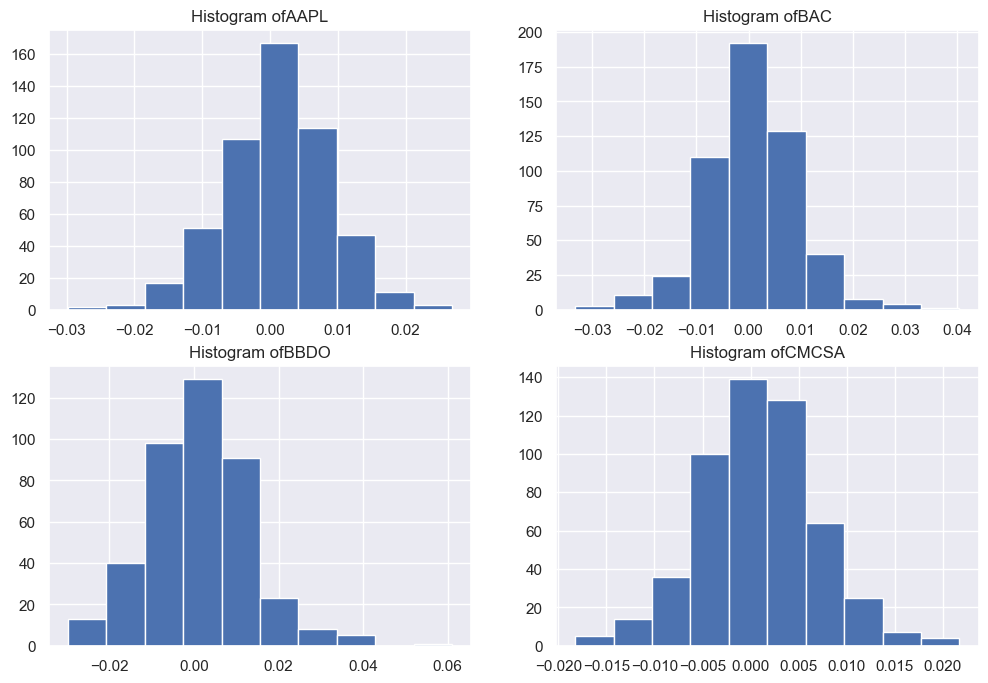

In [4]:
plt.figure(figsize=(12,8))
k=1

# 처음 4개 종목 선정
for i in stocks[:4]:
    plt.subplot(2,2,k)
    plt.hist(crash_dataw[crash_dataw.TICKER==i]['RET'])
    plt.title('Histogram of' + i)
    k+=1
plt.show()

- 시장 영향 배제한 방식으로 수익률 계산 -> "기업별 수익률"
- 기업별 주간 수익률 계산 위해 다음 식 기반으로 선형 회귀 실행: $r_{j,t}=\alpha_0+\beta_1r_{m,t-2}+..+\beta_5r_{m,t+2}+\epsilon_{j,t}$
- $r_{j,t}$: t주에 j회사의 수익률
- $r_{m,t}$: t 주에 CRSP 가치 가중 시장 수익률에 대한 수익률
- 회귀의 잔차를 1+로그 로 크기 조정하면 기업 고유의 수익률 얻을 수 있음

In [5]:
import statsmodels.api as sm
residuals=[]

for i in stocks:
    Y=crash_dataw.loc[crash_dataw['TICKER']==i]['RET'].values
    X=crash_dataw.loc[crash_dataw['TICKER']==i]['vwretx'].values
    X=sm.add_constant(X)
    ols=sm.OLS(Y[2:-2], X[2:-2] + X[1:-3] + X[0:-4] + X[3:-1] + X[4:]).fit()
    residuals.append(ols.resid)

# 기업별 주간 수익률
residuals=list(map(lambda x: np.log(1+x), residuals))

crash_data_sliced=[]
for i in stocks:
    crash_data_sliced.append(crash_dataw.loc[crash_dataw.TICKER==i][2:-2])

crash_data_sliced=pd.concat(crash_data_sliced, axis=0)
crash_data_sliced.head()

,TICKER,date,RET,vwretx,VOL,BIDLO,ASKHI,PRC
2,AAPL,2010-01-24,-0.009510,-0.009479,25930885.00,205.277505,212.888450,208.146752
3,AAPL,2010-01-31,-0.005426,-0.003738,52020594.00,198.250202,207.338002,201.650398
4,AAPL,2010-02-07,0.003722,-0.001463,26953208.40,192.304004,197.378002,195.466002
5,AAPL,2010-02-14,0.005031,0.002970,19731018.60,194.513998,198.674002,196.895200
6,AAPL,2010-02-21,0.001640,0.007700,16618997.25,201.102500,203.772500,202.636995


In [6]:
# 데이터가 정규분포를 따른다고 가정 -> 데이터의 중심에서 멀리 떨어진 값을 이상치로 판단
from sklearn.covariance import EllipticEnvelope
envelope=EllipticEnvelope(contamination=0.02, support_fraction=1) # 데이터에서 2%를 이상치로
ee_predictions={}

for i, j in zip(range(len(stocks)), stocks):
    envelope.fit(np.array(residuals[i]).reshape(-1,1))
    ee_predictions[j]=envelope.predict(np.array(residuals[i]).reshape(-1,1)) # 폭락 예측

transform=[]
for i in stocks:
    for j in range(len(ee_predictions[i])):
        transform.append(np.where(ee_predictions[i][j]==1, 0, -1)) # 1(정상)이면 0, (이상치)아니면 -1

crash_data_sliced=crash_data_sliced.reset_index()
crash_data_sliced['residuals']=np.concatenate(residuals)
crash_data_sliced['neg_outliers']=np.where((np.array(transform))==-1,1,0) # 이상치=1, 정상=0
crash_data_sliced.loc[(crash_data_sliced.neg_outliers==1)&(crash_data_sliced.residuals>0),'neg_outliers']=0 # 양의 이상치

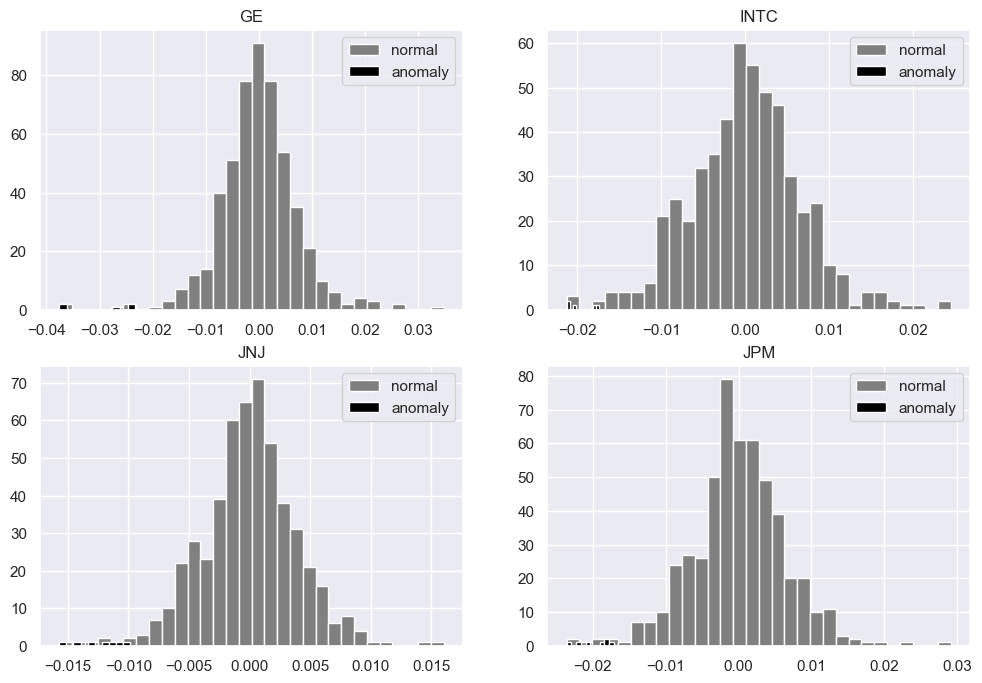

In [7]:
plt.figure(figsize=(12,8))
k=1

for i in stocks[8:12]:
    plt.subplot(2,2,k)
    crash_data_sliced['residuals'][crash_data_sliced.TICKER==i].hist(label='normal', bins=30, color='gray')
    outliers=crash_data_sliced['residuals'][(crash_data_sliced.TICKER==i)&(crash_data_sliced.neg_outliers>0)] # 음의 이상치
    outliers.hist(color='black', label='anomaly')
    plt.title(i)
    plt.legend()
    k+=1
plt.show()

In [8]:
# 이제 분석에 대차대조표 정보 필요 -> 병합되도록 주간 데이터를 연간 데이터로 변환


In [9]:
# crash_data_sliced=crash_data_sliced.set_index('date')
crash_data_sliced.index=pd.to_datetime(crash_data_sliced.index)

std=crash_data.groupby('TICKER')['RET'].resample('W').std().reset_index() # 주간 표준편차
crash_dataw['std']=pd.DataFrame(std['RET'])

yearly_data=crash_data_sliced.groupby('TICKER')['residuals'].resample('Y').agg({'mean', 'std'}).reset_index()
yearly_data.columns=['TICKER', 'date', 'mean', 'std']
yearly_data.head()

,TICKER,date,mean,std
0,AAPL,1970-12-31,-0.000029,0.007567
1,BAC,1970-12-31,-0.000035,0.008315
2,BBDO,1970-12-31,-0.000069,0.011779
3,CMCSA,1970-12-31,-0.000017,0.005802
4,CSCO,1970-12-31,-0.000023,0.006825


In [10]:
merge_crash=pd.merge(crash_data_sliced.reset_index(), yearly_data, how='outer', on=['TICKER', 'date']) # 한 쪽에만 있는 날짜라도 버리지 않음
merge_crash[['annual_mean','annual_std']]=merge_crash.sort_values(by=['TICKER', 'date']).iloc[:,-2:].fillna(method='bfill') # 뒤에 있는 값을 앞에 채움
merge_crash['residuals']=merge_crash.sort_values(by=['TICKER','date'])['residuals'].fillna(method='ffill') # 앞에 있는 값을 뒤쪽으로 채움
merge_crash=merge_crash.drop(merge_crash.iloc[:,-4:-2], axis=1) 

In [11]:
crash_risk_out=[]

for j in stocks:
    for k in range(len(merge_crash[merge_crash.TICKER==j])):
        if merge_crash[merge_crash.TICKER==j]['residuals'].iloc[k]<\
        merge_crash[merge_crash.TICKER==j]['annual_mean'].iloc[k]-3.09*\
        merge_crash[merge_crash.TICKER==j]['annual_std'].iloc[k]:
            crash_risk_out.append(1)
        else:
            crash_risk_out.append(0)
merge_crash['crash_risk']=crash_risk_out
merge_crash['crash_risk'].value_counts()

crash_risk
0    13134
1      181
Name: count, dtype: int64

In [12]:
merge_crash=merge_crash.set_index('date')
merge_crash_annual=merge_crash.groupby('TICKER').resample('1Y')['crash_risk'].sum().reset_index()

In [13]:
# DUVOL / NCSKEW 계산
# 하락주: 주간 수익률이 연간 수익률보다 작은 주
down=[]
for j in range(len(merge_crash)):
    if merge_crash['residuals'].iloc[j]<merge_crash['annual_mean'].iloc[j]:
        down.append(1) # 하락주
    else:
        down.append(0) # 상승주
merge_crash=merge_crash.reset_index()
merge_crash['down']=pd.DataFrame(down)
merge_crash['up']=1 - pd.DataFrame(down)
down_residuals=merge_crash[merge_crash.down==1][['residuals','TICKER','date']]
up_residuals=merge_crash[merge_crash.up==1][['residuals','TICKER','date']]

In [14]:
down_residuals['residuals_down_sq']=down_residuals['residuals']**2
down_residuals['residuals_down_cubic']=down_residuals['residuals']**3
up_residuals['residuals_up_sq']=up_residuals['residuals']**2
up_residuals['residuals_up_cubic']=up_residuals['residuals']**3
down_residuals['down_residuals']=down_residuals['residuals']
up_residuals['up_residuals']=up_residuals['residuals']
del down_residuals['residuals']
del up_residuals['residuals']

merge_crash['residuals_sq']=merge_crash['residuals']**2
merge_crash['residuals_cubic']=merge_crash['residuals']**3

In [16]:
merge_crash_all=merge_crash.merge(down_residuals, on=['TICKER','date'],how='outer')
merge_crash_all=merge_crash_all.merge(up_residuals, on=['TICKER','date'],how='outer')
cols=['BIDLO','ASKHI','residuals','annual_std','residuals_sq','residuals_cubic','down','up','residuals_up_sq','residuals_down_sq','neg_outliers']
merge_crash_all=merge_crash_all.set_index('date')
merge_grouped=merge_crash_all.groupby('TICKER')[cols].resample('1Y').sum().reset_index()
merge_grouped['neg_outliers']=np.where(merge_grouped.neg_outliers>=1,1,0)

In [17]:
merge_grouped=merge_grouped.set_index('date')
merge_all=merge_grouped.groupby('TICKER').resample('1Y').agg({'down':['sum','count'], 'up':['sum','count']}).reset_index()
merge_all.head()

TICKER       date down        up      
                     sum count sum count
0   AAPL 1970-12-31    0     1   1     1
1   AAPL 1971-12-31    0     1   0     1
2   AAPL 1972-12-31    0     1   0     1
3   AAPL 1973-12-31    0     1   0     1
4   AAPL 1974-12-31    0     1   0     1

In [18]:
merge_grouped['down']=merge_all['down']['sum'].values
merge_grouped['up']=merge_all['up']['sum'].values
merge_grouped['count']=merge_grouped['down']+merge_grouped['up']

In [19]:
merge_grouped=merge_grouped.reset_index()
merge_grouped['duvol']=np.log(((merge_grouped['up']-1)*merge_grouped['residuals_down_sq'])/\
                              ((merge_grouped['down']-1)*merge_grouped['residuals_up_sq']))
merge_grouped['duvol'].mean()

np.float64(-0.008260200770983085)

In [20]:
merge_grouped['ncskew']=-(((merge_grouped['count']*(merge_grouped['count']-1)**(3/2))*merge_grouped['residuals_cubic'])/\
                          (((merge_grouped['count']-1)*(merge_grouped['count']-2))*merge_grouped['residuals_sq']**(3/2)))

In [21]:
merge_grouped['ncskew'].mean()

np.float64(-0.019725736157314794)

In [22]:
merge_grouped['crash_risk']=merge_crash_annual['crash_risk']
merge_grouped['crash_risk']=np.where(merge_grouped.crash_risk>=1,1,0)

merge_crash_all_grouped2=merge_crash_all.groupby('TICKER')[['VOL','PRC']].resample('1Y').mean().reset_index()
merge_grouped[['VOL','PRC']]=merge_crash_all_grouped2[['VOL','PRC']]
merge_grouped[['ncskew','duvol']].corr()

,ncskew,duvol
ncskew,1.000000,0.883343
duvol,0.883343,1.000000


- DUVOL: 연간 평균에 비해 더 낮았던 수익 규모 & 더 높았던 수익 규모의 비율을 알려줌 ~ 클수록 높은 폭락 확률 의미
- NCSKEW: 왼쪽 꼬리가 오른쪽 꼬리보다 길면 주가 폭락 경향
- 둘이 높은 상관관계: 두 측정값이 서로 다른 방식으로 동일한 정보를 수집함

(\*) 로지스틱 패널 응용
- 패널 데이터 분석: 시계열과 횡단면 데이터 결합
- 주가 폭락 위험의 중요한 측면: 기업 고유의 투자 심리
- 주가수익비율, 회전율, 지분율, 폐쇄형 펀드 할인, 레버리지, 매수와 매도량: 기업 고유의 감정 식별에 사용됨